In [1]:
import pandas as pd

# 데이터 로드
df = pd.read_csv('./wine_review.csv')

# 데이터 구조 확인
df.info()

# 데이터 샘플 확인
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2890 non-null   object 
 1   asins                 870 non-null    object 
 2   brand                 2825 non-null   object 
 3   categories            2890 non-null   object 
 4   dateAdded             2890 non-null   object 
 5   dateUpdated           2890 non-null   object 
 6   descriptions          2738 non-null   object 
 7   dimension             1838 non-null   object 
 8   ean                   2166 non-null   object 
 9   flavors               151 non-null    object 
 10  keys                  2890 non-null   object 
 11  manufacturer          849 non-null    object 
 12  manufacturerNumber    2457 non-null   object 
 13  name                  2890 non-null   object 
 14  reviews.date          2552 non-null   object 
 15  reviews.dateAdded    

,id,asins,brand,categories,dateAdded,dateUpdated,descriptions,dimension,ean,flavors,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,sourceURLs,upc,weight
0,AV13ClKCGV-KLJ3akN68,NaN,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,2018-01-10T18:06:28Z,NaN,1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This a fantastic white wine for any occasion!,My Favorite White Wine,NaN,NaN,Bjh,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,4.9213E+11,1.0 lbs
1,AV13CsvW-jtxr-f38AQO,NaN,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,2018-01-10T05:38:33Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",4.25 in x 4.25 in x 5.25 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,"Tart, not sweet...very refreshing and delicious!",Yum!!,NaN,NaN,Wino,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,83120003441,2.45 lbs
2,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,I was given this wine so it was a delightful s...,A New Favorite!,NaN,NaN,Bama Mom,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
3,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This is a phenomenal wine and my new favorite ...,"Bold, Flavorful, Aromatic, Delicious",NaN,NaN,Av Dub,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
4,AV13CYL4-jtxr-f37_-t,NaN,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,2018-01-10T18:06:29Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,4 750ml bottles for the price of two With way ...,"Yum! Plus, Environmentally Friendly!",Overland Park,NaN,Chelseamay,NaN,https://redsky.target.com/groot-domain-api/v1/...,85200600465,1.0 lbs


# 결측값 제거

In [2]:
# 감성 분석에 필요한 컬럼만 선택
df = df[['reviews.text']]

# 결측값 확인
df.isnull().sum()

reviews.text    1
dtype: int64

In [3]:
# 결측값 제거
df = df.dropna(subset=['reviews.text'])

# 컬럼명 변경
df = df.rename(columns={'reviews.text': 'reviews_text'})

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2889 entries, 0 to 2889
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviews_text  2889 non-null   object
dtypes: object(1)
memory usage: 45.1+ KB


,reviews_text
0,This a fantastic white wine for any occasion!
1,"Tart, not sweet...very refreshing and delicious!"
2,I was given this wine so it was a delightful s...
3,This is a phenomenal wine and my new favorite ...
4,4 750ml bottles for the price of two With way ...


# 토큰화 / 불용어 제거 / 표제어 추출

토큰화는 주어진 문장을 단어 단위로 분할하는 과정입니다.

불용어는 문장의 의미를 이해하는 데 관여하지 않는 단어들로 'a', 'the', 'is'와 같은 단어들이 포함됩니다.

표제어 추출은 텍스트에서 단어의 원형을 찾아내는 과정입니다. 이 과정에서 단어들을 문법적이나 의미적으로 관련된 단일 형태로 변환하여 처리의 용이성을 높입니다.

In [4]:
%pip install nltk
import pandas as pd
import nltk as nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer # nltk의 VADER 감정 분석기를 가져옮

nltk.download('vader_lexicon') # VADER 감정 분석기에 필요한 어휘 자료를 다운로드
nltk.download('punkt') # 토큰화에 필요한 데이터셋
nltk.download('wordnet') # 표제어 추출에 필요한 데이터셋 
nltk.download('stopwords') # 불용어 제거에 필요한 데이터셋 

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer() 

# 토큰화, 불용어 제거, 표제어 추출
def preprocess_text(text):
    # 토큰화
    tokens = word_tokenize(text.lower())
    # 표제어 추출 및 불용어 제거
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

# 전처리된 리뷰를 processed_reviews 열에 저장
df['processed_reviews'] = df['reviews_text'].apply(preprocess_text)

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 모델 학습 및 하이퍼파라미터 튜닝

NLTK 라이브러리의 VADER 감정 분석기를 사용합니다. VADER는 감정 분석을 위한 사전 기반의 감정 분석 도구로, 텍스트의 각 단어와 문맥을 고려하여 감정 점수를 계산합니다.

감정 점수는 -1에서 1 사이의 값이며, 값이 클수록 긍정을, 값이 작을수록 부정을 의미합니다.

긍정과 부정 모두 해당되지 않는 경우에, 0을 반환합니다.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

vader_sentiment = SentimentIntensityAnalyzer() # VADER 감정 분석기를 초기화

# 리뷰를 입력으로 받아 감성 분석을 적용하는 함수
def calc_sentiment(review):    
    if review == "No Negative" or review == "No Positive": # 리뷰가 "No Negative" 또는 "No Positive"인 경우
        return 0
    return vader_sentiment.polarity_scores(review)["compound"]  # 리뷰가 텍스트인 경우 VADER 감정 분석기를 사용하여 감정 점수(컴파운드 스코어)를 계산하고 반환

# processed_reviews에 감성 분석을 적용하여 Sentiment 열에 저장
df["Sentiment"] = df.processed_reviews.apply(calc_sentiment)

# Sentiment 값을 기준으로 정렬
df = df.sort_values(by=["Sentiment"], ascending=True)
print(df[["processed_reviews", "Sentiment"]])

# 긍정/부정 레이블 생성
df['sentiment_label'] = df['Sentiment'].apply(lambda x: 1 if x >= 0 else 0)

# 특징 및 레이블 설정
X = df['processed_reviews']
y = df['sentiment_label']

# train과 test를 8:2의 비율로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


TfidfVectorizer와 Logistic Regression을 사용합니다.

TfidfVectorizer는 텍스트 데이터를 TF-IDF(Term Frequency-Inverse Document Frequency) 벡터로 변환합니다.
단어의 빈도와 중요도를 반영하여 수치 벡터를 생성합니다.

Logistic Regression은 벡터화된 데이터를 입력으로 받아 감성 분류를 수행하는 로지스틱 회귀 모델을 사용합니다.
solver='liblinear'를 사용하여 작은 데이터셋에 적합한 solver를 지정합니다.

그리드 서치는 GridSearchCV를 사용하여 5-fold 교차 검증(cv=5)과 정확도(scoring='accuracy')를 평가 지표로 설정하여 적용합니다. 파이프라인에는 TF-IDF 벡터화가 먼저 적용되고, 이후에 로지스틱 회귀가 이어집니다.



In [9]:
# 파이프라인 구성
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(solver='liblinear'))
])

# 하이퍼파라미터 그리드 설정
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)], # TF-IDF 벡터화에서 n-gram 범위를 (1, 2)로 설정
    'tfidf__max_df': [0.75, 1.0], # TF-IDF 벡터화에서 max_df는 0.75 또는 1.0으로 설정
    'clf__C': [0.1, 1, 10] # 로지스틱 회귀 모델의 규제 매개변수 C는 0.1, 1, 10 중 하나로 설정
}

# 그리드 서치 적용
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
best_params = grid_search.best_params_

# 모델 평가

그리드 서치를 사용하여 test 데이터에 대한 예측을 수행합니다.

예측 결과를 바탕으로 accuracy, precision, recall, f1, roc_auc와 같은 평가 지표들을 계산합니다.

evaluation_results에는 계산된 평가 지표들과 최적의 하이퍼파라미터 정보가 저장됩니다.


In [10]:
# Predict
y_pred = grid_search.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, grid_search.decision_function(X_test))

# 평가 결과
evaluation_results = {
    'Best Params': best_params,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC': roc_auc
}

evaluation_results

{'Best Params': {'clf__C': 10,
  'tfidf__max_df': 0.75,
  'tfidf__ngram_range': (1, 2)},
 'Accuracy': 0.9256055363321799,
 'Precision': 0.9285714285714286,
 'Recall': 0.994263862332696,
 'F1 Score': 0.9602954755309326,
 'ROC-AUC': 0.8800278115765687}

# 시각화

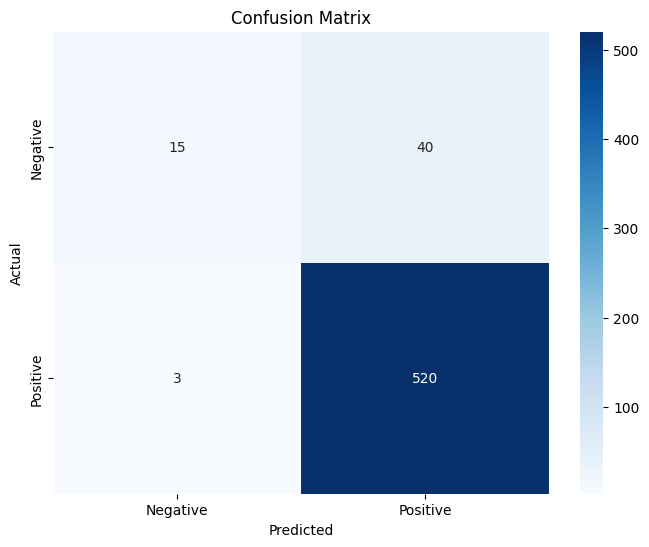

In [11]:
# 혼동 행렬 생성
conf_matrix = confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive']) # Heatmap 사용
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


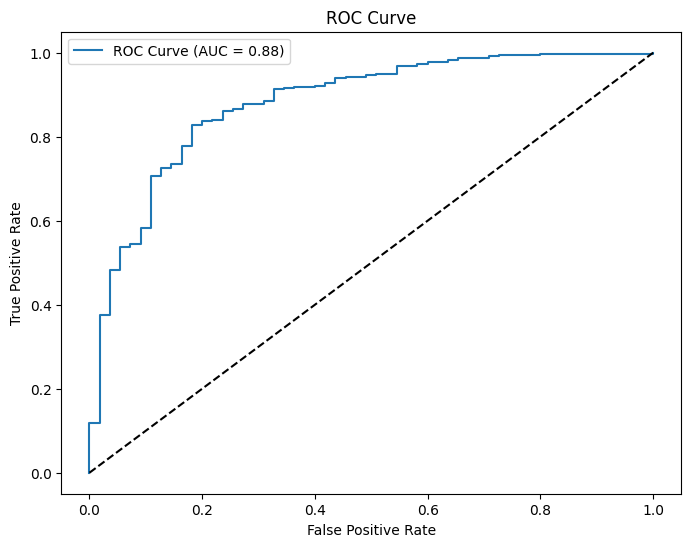

In [12]:
# ROC 곡선 시각화
from sklearn.metrics import roc_curve

# test 데이터를 사용하여 모델의 결정 함수 값에 대한 ROC Curve를 계산
fpr, tpr, thresholds = roc_curve(y_test, grid_search.decision_function(X_test))
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})') 
plt.plot([0, 1], [0, 1], 'k--') # 대각선을 그려 랜덤 선택 수준의 모델을 표시
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [13]:
df

,reviews_text,processed_reviews,Sentiment,sentiment_label
1253,I mentioned to the bar tender that the secret ...,mentioned bar tender secret ingredient mojito ...,-0.9062,0
1440,"First, let's establish that the whole point of...",first let establish whole point buying tube cr...,-0.8779,0
2516,I was 17 when I first started to use it. I wen...,17 first started use went visit granny got rea...,-0.8526,0
45,"I didnt find this to be sweet at all, but ever...",didnt find sweet everyones taste differs usual...,-0.8430,0
2380,this little jar's contents are the item to go ...,little jar content item go stress seasonal pai...,-0.8402,0
...,...,...,...,...
2802,I knew that Kevin O'Leary loved good wine. Wel...,knew kevin loved good wine well let tell also ...,0.9944,1
978,"Hi, this is Cocktail Artist Robert Porter. Fir...",hi cocktail artist robert porter first like th...,0.9945,1
2654,I am in love with this lip balm. the original ...,love lip balm original pot version love way ma...,0.9955,1
2577,I am in love with this lip balm. the original ...,love lip balm original pot version love way ma...,0.9955,1
